**Importing Packages**

In [22]:
#importing required libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re 
import string
import nltk
nltk.download('punkt')

import os
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Tamil Dataset**

In [23]:
#reading the tamil dataset
train=pd.read_csv('/content/drive/MyDrive/offensive language/Tamil dataset/Tamil-Codemixed_offensive_Training-Tweet.tsv',sep='\t', index_col=[0])
test=pd.read_csv('/content/drive/MyDrive/offensive language/Tamil dataset/Tamil_hasoc_tanglish_test_withlabels(1).tsv',sep='\t', index_col=[0])

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


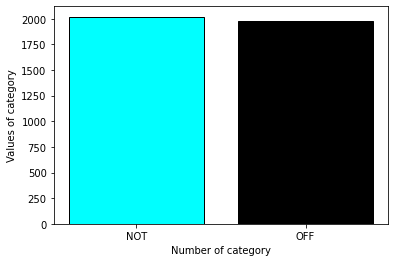

NOT    2020
OFF    1980
Name: Category, dtype: int64

In [25]:
# bar chart
value=[2020,1980]
category=['NOT','OFF']
plt.bar(category,value,color=["cyan","black"],edgecolor='black')
plt.xlabel('Number of category')
plt.ylabel('Values of category')
plt.show()

#Label counts
train['Category'].value_counts()

# **Removing punctuation**

In [26]:
#remove punctuation
import string
def remove_punctuations(txt):
    text_nopunc="".join([c for c in txt if c not in string.punctuation])
    return text_nopunc

train['Text']=train['Text'].apply(lambda x: remove_punctuations(x))
train

,Text,Category
TA_HL100,Iyaooo Kovam pattutene sothula visatha vachuru...,NOT
TA_HL101,Asha Apo neenga atha government ku theriya pad...,NOT
TA_HL102,Bala sundar ayyo sorryantha line ah explain pa...,NOT
TA_HL105,kalimuthu ne ena lusayaaru edhu panaalum en da...,NOT
TA_HL109,1st baby ku neat ah feed panunga plzz ipdi iru...,NOT
...,...,...
TA_TW6620,Yaroda body structure semaya irukum Sema mood ...,OFF
TA_TW3336,Yenda naangala politics varom nu pala varusham...,OFF
TA_HL1105,Yepdithan seruppala adichalum arasiyalvathikku...,OFF
TA_TW1915,USER Paithiyam ena unga vanthu full ah forward...,OFF


# **Spliting to Dev Dataset**

In [27]:
#splitting dataset
X_train, X_dev, y_train, y_dev = train_test_split(train['Text'], train['Category'], test_size=0.30, random_state=42)

X_test= test['Text']
y_test= test['Category']

# **Encoding**

In [28]:
#Encoding Labels

Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train)
y_test = Encoder.transform(y_test)
y_dev = Encoder.transform(y_dev)

In [29]:
#tfidf
Tfidf_vect = TfidfVectorizer(max_features=2000)
X_train = Tfidf_vect.fit_transform(X_train).toarray()
X_dev = Tfidf_vect.transform(X_dev).toarray()
X_test = Tfidf_vect.transform(X_test).toarray()

In [30]:
print(Tfidf_vect.vocabulary_)

{'user': 1798, 'dei': 329, 'following': 489, 'varum': 1854, 'adhu': 58, 'unaku': 1765, 'na': 984, 'ni': 1052, 'kama': 717, 'punda': 1412, 'epdi': 429, 'nu': 1065, 'matum': 916, 'en': 390, 'thangachi': 1653, 'pani': 1192, 'solli': 1545, 'ya': 1964, 'suttu': 1618, 'kudutha': 812, 'solu': 1561, 'onum': 1096, 'theriyatha': 1693, 'paiyana': 1167, 'yean': 1977, 'ipdi': 611, 'pananum': 1183, 'ne': 1030, 'olunga': 1084, 'intha': 603, 'summa': 1604, 'enachu': 392, 'call': 251, 'panni': 1204, 'pesu': 1289, 'apo': 136, 'konjam': 791, 'ahh': 87, 'iruku': 640, 'bby': 217, 'ma': 855, 'va': 1802, 'ayyo': 206, 'paka': 1168, 'mudila': 960, 'avlo': 200, 'kevalam': 761, 'nalaiku': 1009, 'ungala': 1768, 'paaru': 1137, 'da': 312, 'kena': 755, 'engala': 404, 'romba': 1462, 'naala': 989, 'wait': 1925, 'oru': 1116, 'update': 1791, 'kudunga': 811, 'thalapathy': 1644, 'birthday': 233, 'ah': 86, 'kondu': 789, '10': 0, 'days': 322, 'keta': 756, 'at': 165, 'ethavathu': 447, 'help': 539, 'pannuvanga': 1214, 'athaan

# **Naive Bayes**

In [31]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [32]:
# predict the dev dataset
pred_NB = Naive.predict(X_dev)

print(confusion_matrix(y_dev,pred_NB)) 
print(classification_report(y_dev,pred_NB))

[[525 105]
 [ 96 474]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       630
           1       0.82      0.83      0.83       570

    accuracy                           0.83      1200
   macro avg       0.83      0.83      0.83      1200
weighted avg       0.83      0.83      0.83      1200



In [33]:
# predict the test data
pred_NB_test = Naive.predict(X_test)

print(confusion_matrix(y_test,pred_NB_test)) 
print(classification_report(y_test,pred_NB_test))

[[398  67]
 [ 79 396]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       465
           1       0.86      0.83      0.84       475

    accuracy                           0.84       940
   macro avg       0.84      0.84      0.84       940
weighted avg       0.84      0.84      0.84       940



#**Support Vector Machine**

In [34]:
# fit the training dataset on the SVM classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [35]:
# predict the dev dataset
pred_SVM = SVM.predict(X_dev)

print(confusion_matrix(y_dev,pred_SVM)) 
print(classification_report(y_dev,pred_SVM))

[[528 102]
 [105 465]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       630
           1       0.82      0.82      0.82       570

    accuracy                           0.83      1200
   macro avg       0.83      0.83      0.83      1200
weighted avg       0.83      0.83      0.83      1200



In [36]:
# predict the test dataset
pred_SVM_test = SVM.predict(X_test)

print(confusion_matrix(y_test,pred_SVM_test)) 
print(classification_report(y_test,pred_SVM_test))

[[366  99]
 [ 70 405]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       465
           1       0.80      0.85      0.83       475

    accuracy                           0.82       940
   macro avg       0.82      0.82      0.82       940
weighted avg       0.82      0.82      0.82       940



# **Logistic Regression**

In [37]:
# fit the training dataset on the LR classifier
lr = LogisticRegression(C=2,class_weight = 'balanced')
lr.fit(X_train,y_train)

LogisticRegression(C=2, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
# predict the dev dataset
pred_LR = lr.predict(X_dev)

print(confusion_matrix(y_dev,pred_LR)) 
print(classification_report(y_dev,pred_LR))

[[526 104]
 [105 465]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       630
           1       0.82      0.82      0.82       570

    accuracy                           0.83      1200
   macro avg       0.83      0.83      0.83      1200
weighted avg       0.83      0.83      0.83      1200



In [39]:
# predict the test dataset
pred_LR_test = lr.predict(X_test)

print(confusion_matrix(y_test,pred_LR_test)) 
print(classification_report(y_test,pred_LR_test))

[[381  84]
 [ 58 417]]
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       465
           1       0.83      0.88      0.85       475

    accuracy                           0.85       940
   macro avg       0.85      0.85      0.85       940
weighted avg       0.85      0.85      0.85       940



# **Random** **Forest**

In [40]:
sc_X = StandardScaler(with_mean=False)
X_Train_RF = sc_X.fit_transform(X_train)
X_dev_RF = sc_X.transform(X_dev)
X_test_RF = sc_X.transform(X_test)

#Classifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_Train_RF,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [41]:
# Predicting the dev dataset 
pred_RF = classifier.predict(X_dev_RF)

print(confusion_matrix(y_dev,pred_RF)) 
print(classification_report(y_dev,pred_RF))

[[524 106]
 [113 457]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       630
           1       0.81      0.80      0.81       570

    accuracy                           0.82      1200
   macro avg       0.82      0.82      0.82      1200
weighted avg       0.82      0.82      0.82      1200



In [42]:
# Predicting the test dataset 
pred_RF_test = classifier.predict(X_test_RF)

print(confusion_matrix(y_test,pred_RF_test)) 
print(classification_report(y_test,pred_RF_test))

[[336 129]
 [ 45 430]]
              precision    recall  f1-score   support

           0       0.88      0.72      0.79       465
           1       0.77      0.91      0.83       475

    accuracy                           0.81       940
   macro avg       0.83      0.81      0.81       940
weighted avg       0.82      0.81      0.81       940

